In [32]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
pd.options.display.float_format = '{:.6f}'.format

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My Drive/algorithmtrading/pair_trading

/content/drive/My Drive/algorithmtrading/pair_trading


In [ ]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin-1:end]

# 1. 과거 1분단위 데이터 받아오기

In [ ]:
now = '20210204'

samsung = pd.read_pickle('삼성전자(m)_'+now)[['체결시간','현재가']]
hynix = pd.read_pickle('SK하이닉스(m)_'+now)[['체결시간','현재가']]
lg = pd.read_pickle('LG화학(m)_'+now)[['체결시간','현재가']]
mobis = pd.read_pickle('삼성전자우(m)_'+now)[['체결시간','현재가']]
naver = pd.read_pickle('NAVER(m)_'+now)[['체결시간','현재가']]
samsung_bio = pd.read_pickle('삼성바이오로직스(m)_'+now)[['체결시간','현재가']]
hyundai = pd.read_pickle('현대차(m)_'+now)[['체결시간','현재가']]
samsung_sdi = pd.read_pickle('삼성SDI(m)_'+now)[['체결시간','현재가']]
celltrion = pd.read_pickle('셀트리온(m)_'+now)[['체결시간','현재가']]
kakao = pd.read_pickle('카카오(m)_'+now)[['체결시간','현재가']]

temp =  pd.merge(left = samsung , right = hynix, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = lg, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = samsung_wu, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = naver, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = samsung_bio, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = hyundai, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = samsung_sdi, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = celltrion, how = "inner", on = "체결시간")
temp =  pd.merge(left = temp , right = kakao, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')

temp.columns = ['samsung','hynix','lg','samsung_wu','naver','samsung_bio','hyundai','samsung_sdi','celltrion','kakao']

temp['samsung']=abs(pd.to_numeric(temp['samsung']))
temp['hynix']=abs(pd.to_numeric(temp['hynix']))
temp['lg']=abs(pd.to_numeric(temp['lg']))
temp['samsung_wu']=abs(pd.to_numeric(temp['samsung_wu']))
temp['naver']=abs(pd.to_numeric(temp['naver']))
temp['samsung_bio']=abs(pd.to_numeric(temp['samsung_bio']))
temp['hyundai']=abs(pd.to_numeric(temp['hyundai']))
temp['samsung_sdi']=abs(pd.to_numeric(temp['samsung_sdi']))
temp['celltrion']=abs(pd.to_numeric(temp['celltrion']))
temp['kakao']=abs(pd.to_numeric(temp['kakao']))

temp['samsung_cumret'] = np.log(temp['samsung']/temp['samsung'][0])
temp['hynix_cumret'] = np.log(temp['hynix']/temp['hynix'][0])
temp['lg_cumret'] = np.log(temp['lg']/temp['lg'][0])
temp['samsung_wu_cumret'] = np.log(temp['samsung_wu']/temp['samsung_wu'][0])
temp['naver_cumret'] = np.log(temp['naver']/temp['naver'][0])
temp['samsung_bio_cumret'] = np.log(temp['samsung_bio']/temp['samsung_bio'][0])
temp['hyundai_cumret'] = np.log(temp['hyundai']/temp['hyundai'][0])
temp['samsung_sdi_cumret'] = np.log(temp['samsung_sdi']/temp['samsung_sdi'][0])
temp['celltrion_cumret'] = np.log(temp['celltrion']/temp['celltrion'][0])
temp['kakao_cumret'] = np.log(temp['kakao']/temp['kakao'][0])

temp

,samsung,hynix,lg,samsung_wu,naver,samsung_bio,hyundai,samsung_sdi,celltrion,kakao,samsung_cumret,hynix_cumret,lg_cumret,samsung_wu_cumret,naver_cumret,samsung_bio_cumret,hyundai_cumret,samsung_sdi_cumret,celltrion_cumret,kakao_cumret
체결시간,,,,,,,,,,,,,,,,,,,,
20200203090000,55400,91800,328500,46800,178000,473500,122500,269000,158593,157000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20200203090100,55400,91600,326500,46700,178000,473500,121500,268000,158593,156500,0.000000,-0.002181,-0.006107,-0.002139,0.000000,0.000000,-0.008197,-0.003724,0.000000,-0.003190
20200203090200,55500,92000,328000,46600,178500,474500,122500,269500,159084,157000,0.001803,0.002176,-0.001523,-0.004283,0.002805,0.002110,0.000000,0.001857,0.003091,0.000000
20200203090300,55500,92100,326500,46500,178500,474000,121500,270500,159575,157500,0.001803,0.003263,-0.006107,-0.006431,0.002805,0.001055,-0.008197,0.005561,0.006173,0.003180
20200203090400,55400,92300,327000,46550,178500,476000,121500,272000,159084,158000,0.000000,0.005432,-0.004577,-0.005356,0.002805,0.005266,-0.008197,0.011091,0.003091,0.006349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210204151600,82500,125000,995000,73700,358000,809000,247500,749000,342000,453500,0.398219,0.308701,1.108206,0.454120,0.698749,0.535647,0.703300,1.024028,0.768470,1.060749
20210204151700,82400,125000,996000,73800,357500,809000,247500,748000,341500,453500,0.397006,0.308701,1.109210,0.455476,0.697352,0.535647,0.703300,1.022692,0.767007,1.060749
20210204151800,82500,125000,996000,73800,358000,809000,248000,748000,342500,454000,0.398219,0.308701,1.109210,0.455476,0.698749,0.535647,0.705318,1.022692,0.769930,1.061851


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

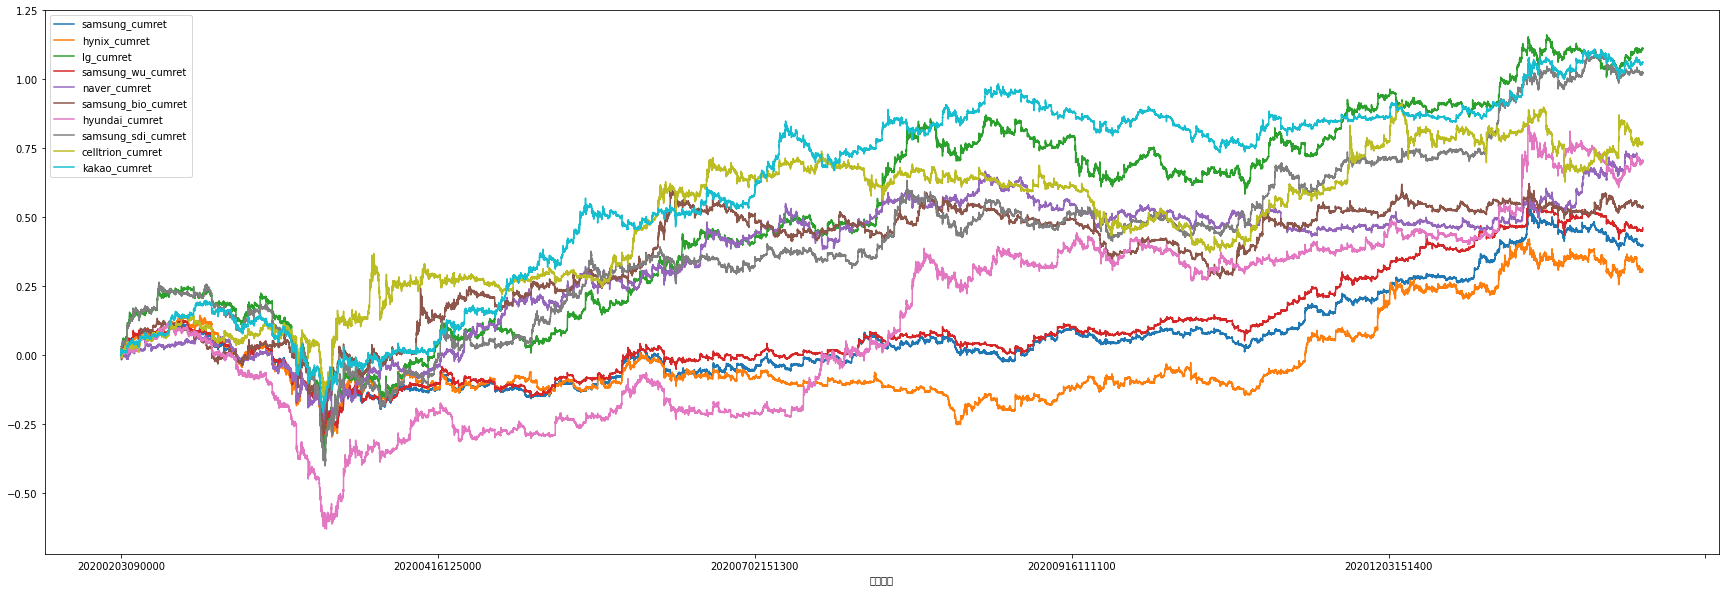

In [ ]:
temp[['samsung_cumret','hynix_cumret','lg_cumret','samsung_wu_cumret','naver_cumret','samsung_bio_cumret','hyundai_cumret','samsung_sdi_cumret','celltrion_cumret','kakao_cumret']].plot()

In [ ]:
print(coint(temp['kodex200'],temp['samsung_group']))

(-3.4821500768684452, 0.03401089036866775, array([-3.89659034, -3.33621387, -3.04450822]))


# 2. 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [ ]:
df = {}
calender = []
for date in range(20201021,20210204):
    if 20201231 < date < 20210100:
        continue
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        temps['samsung_dayret'] = np.log(temps['samsung']/temps['samsung'][0])
        temps['hynix_dayret'] = np.log(temps['hynix']/temps['hynix'][0])
        temps['lg_dayret'] = np.log(temps['lg']/temps['lg'][0])
        temps['samsung_wu_dayret'] = np.log(temps['samsung_wu']/temps['samsung_wu'][0])
        temps['naver_dayret'] = np.log(temps['naver']/temps['naver'][0])
        temps['samsung_bio_dayret'] = np.log(temps['samsung_bio']/temps['samsung_bio'][0])
        temps['hyundai_dayret'] = np.log(temps['hyundai']/temps['hyundai'][0])
        temps['samsung_sdi_dayret'] = np.log(temps['samsung_sdi']/temps['samsung_sdi'][0])
        temps['celltrion_dayret'] = np.log(temps['celltrion']/temps['celltrion'][0])
        temps['kakao_dayret'] = np.log(temps['kakao']/temps['kakao'][0])
        # temps['spread_cumret'] = temps['samsung_group_cumret'] -temps['kodex200_cumret']
        # temps['spread_dayret']= temps['samsung_group_dayret'] - temps['kodex200_dayret'] 
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

In [ ]:
df['20210126']

,samsung,hynix,lg,samsung_wu,naver,samsung_bio,hyundai,samsung_sdi,celltrion,kakao,samsung_cumret,hynix_cumret,lg_cumret,samsung_wu_cumret,naver_cumret,samsung_bio_cumret,hyundai_cumret,samsung_sdi_cumret,celltrion_cumret,kakao_cumret,samsung_dayret,hynix_dayret,lg_dayret,samsung_wu_dayret,naver_dayret,samsung_bio_dayret,hyundai_dayret,samsung_sdi_dayret,celltrion_dayret,kakao_dayret
체결시간,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20210125153500,89400,135000,990000,79200,349000,790000,260000,790000,321000,473500,0.478541,0.385662,1.103168,0.526093,0.673288,0.511881,0.752571,1.077322,0.705100,1.103906,0.478541,0.385662,1.103168,0.526093,0.673288,0.511881,0.752571,1.077322,0.705100,1.103906
20210126090000,88900,133500,990000,79300,348000,798000,259500,791000,327500,475500,0.472933,0.374489,1.103168,0.527355,0.670419,0.521957,0.750646,1.078587,0.725147,1.108121,0.472933,0.374489,1.103168,0.527355,0.670419,0.521957,0.750646,1.078587,0.725147,1.108121
20210126090100,88800,132000,991000,79300,349500,795000,258500,791000,328500,476000,0.471807,0.363190,1.104178,0.527355,0.674720,0.518190,0.746785,1.078587,0.728196,1.109172,0.471807,0.363190,1.104178,0.527355,0.674720,0.518190,0.746785,1.078587,0.728196,1.109172
20210126090200,88900,133000,988000,79300,350500,797000,257500,793000,329000,476500,0.472933,0.370737,1.101146,0.527355,0.677577,0.520703,0.742909,1.081112,0.729717,1.110222,0.472933,0.370737,1.101146,0.527355,0.677577,0.520703,0.742909,1.081112,0.729717,1.110222
20210126090300,89000,132500,989000,79200,345500,802000,258000,794000,330500,469000,0.474057,0.366970,1.102157,0.526093,0.663209,0.526957,0.744849,1.082372,0.734265,1.094357,0.474057,0.366970,1.102157,0.526093,0.663209,0.526957,0.744849,1.082372,0.734265,1.094357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210126151600,87000,129500,957000,78000,343000,806000,253000,791000,323000,464000,0.451329,0.344069,1.069267,0.510826,0.655947,0.531932,0.725278,1.078587,0.711311,1.083639,0.451329,0.344069,1.069267,0.510826,0.655947,0.531932,0.725278,1.078587,0.711311,1.083639
20210126151700,87100,129500,957000,78100,343000,806000,253500,792000,323500,464000,0.452477,0.344069,1.069267,0.512107,0.655947,0.531932,0.727253,1.079850,0.712858,1.083639,0.452477,0.344069,1.069267,0.512107,0.655947,0.531932,0.727253,1.079850,0.712858,1.083639
20210126151800,87100,129500,959000,78000,343000,806000,254000,792000,324000,464500,0.452477,0.344069,1.071354,0.510826,0.655947,0.531932,0.729223,1.079850,0.714402,1.084716,0.452477,0.344069,1.071354,0.510826,0.655947,0.531932,0.729223,1.079850,0.714402,1.084716


# 3. 그래프 그리기

In [ ]:
for date in calender[-10:]:
    plt.rcParams["figure.figsize"] = (20, 10)
    df[date]['samsung_dayret'].plot()
    df[date]['hynix_dayret'].plot()
    df[date]['lg_dayret'].plot()
    df[date]['samsung_wu_dayret'].plot()
    df[date]['naver_dayret'].plot()
    df[date]['samsung_bio_dayret'].plot()
    df[date]['hyundai_dayret'].plot()
    df[date]['samsung_sdi_dayret'].plot()
    df[date]['celltrion_dayret'].plot()
    df[date]['kakao_dayret'].plot()    
    plt.show()

## 4.체결강도 확인

In [ ]:
cd strength

/content/drive/My Drive/algorithmtrading/pair_trading/strength


In [41]:
now = '(m)20210205'

codes =['samsung','hynix','lg','naver','hyundai','samsung_sdi','celltrion','kakao','mobis','ncsoft'] 

samsung = pd.read_pickle('삼성전자_'+now)  ; samsung.columns = ['samsung_현재가','samsung_전일대비','samsung_등락율','samsung_거래량','samsung_체결강도','samsung_체결강도5분','samsung_체결강도20분','samsung_체결강도60분']
hynix = pd.read_pickle('SK하이닉스_'+now)  ; hynix.columns = ['hynix_현재가','hynix_전일대비','hynix_등락율','hynix_거래량','hynix_체결강도','hynix_체결강도5분','hynix_체결강도20분','hynix_체결강도60분']
lg = pd.read_pickle('LG화학_'+now)  ; lg.columns = ['lg_현재가','lg_전일대비','lg_등락율','lg_거래량','lg_체결강도','lg_체결강도5분','lg_체결강도20분','lg_체결강도60분']
naver = pd.read_pickle('NAVER_'+now)  ; naver.columns = ['naver_현재가','naver_전일대비','naver_등락율','naver_거래량','naver_체결강도','naver_체결강도5분','naver_체결강도20분','naver_체결강도60분']
hyundai = pd.read_pickle('현대차_'+now)  ; hyundai.columns = ['hyundai_현재가','hyundai_전일대비','hyundai_등락율','hyundai_거래량','hyundai_체결강도','hyundai_체결강도5분','hyundai_체결강도20분','hyundai_체결강도60분']
samsung_sdi = pd.read_pickle('삼성SDI_'+now)  ; samsung_sdi.columns = ['samsung_sdi_현재가','samsung_sdi_전일대비','samsung_sdi_등락율','samsung_sdi_거래량','samsung_sdi_체결강도','samsung_sdi_체결강도5분','samsung_sdi_체결강도20분','samsung_sdi_체결강도60분']
celltrion = pd.read_pickle('셀트리온_'+now)  ; celltrion.columns = ['celltrion_현재가','celltrion_전일대비','celltrion_등락율','celltrion_거래량','celltrion_체결강도','celltrion_체결강도5분','celltrion_체결강도20분','celltrion_체결강도60분']
kakao = pd.read_pickle('카카오_'+now)  ; kakao.columns = ['kakao_현재가','kakao_전일대비','kakao_등락율','kakao_거래량','kakao_체결강도','kakao_체결강도5분','kakao_체결강도20분','kakao_체결강도60분']
mobis = pd.read_pickle('현대모비스_'+now)  ; mobis.columns = ['mobis_현재가','mobis_전일대비','mobis_등락율','mobis_거래량','mobis_체결강도','mobis_체결강도5분','mobis_체결강도20분','mobis_체결강도60분']
ncsoft = pd.read_pickle('엔씨소프트_'+now)  ; ncsoft.columns = ['ncsoft_현재가','ncsoft_전일대비','ncsoft_등락율','ncsoft_거래량','ncsoft_체결강도','ncsoft_체결강도5분','ncsoft_체결강도20분','ncsoft_체결강도60분']
tiger = pd.read_pickle('엔씨소프트_'+now)  ; tiger.columns = ['tiger_현재가','tiger_전일대비','tiger_등락율','tiger_거래량','tiger_체결강도','tiger_체결강도5분','tiger_체결강도20분','tiger_체결강도60분']

temp =  pd.merge(left = samsung , right = hynix, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = lg, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = mobis, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = naver, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = ncsoft, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = hyundai, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = samsung_sdi, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = celltrion, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = kakao, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = tiger, how = "inner", on = "time")

# temp['samsung_등락율'] = temp['samsung_등락율'] + 100
# temp['hynix_등락율'] = temp['hynix_등락율'] + 100
# temp['lg_등락율'] = temp['lg_등락율'] + 100
# temp['naver_등락율'] = temp['naver_등락율'] + 100
# temp['hyundai_등락율'] = temp['hyundai_등락율'] + 100
# temp['samsung_sdi_등락율'] = temp['samsung_sdi_등락율'] + 100
# temp['celltrion_등락율'] = temp['celltrion_등락율'] + 100
# temp['kakao_등락율'] = temp['kakao_등락율'] + 100
# temp['mobis_등락율'] = temp['mobis_등락율'] + 100
# temp['ncsoft_등락율'] = temp['ncsoft_등락율'] + 100

temp = temp[::-1]
temp

,samsung_현재가,samsung_전일대비,samsung_등락율,samsung_거래량,samsung_체결강도,samsung_체결강도5분,samsung_체결강도20분,samsung_체결강도60분,hynix_현재가,hynix_전일대비,hynix_등락율,hynix_거래량,hynix_체결강도,hynix_체결강도5분,hynix_체결강도20분,hynix_체결강도60분,lg_현재가,lg_전일대비,lg_등락율,lg_거래량,lg_체결강도,lg_체결강도5분,lg_체결강도20분,lg_체결강도60분,mobis_현재가,mobis_전일대비,mobis_등락율,mobis_거래량,mobis_체결강도,mobis_체결강도5분,mobis_체결강도20분,mobis_체결강도60분,naver_현재가,naver_전일대비,naver_등락율,naver_거래량,naver_체결강도,naver_체결강도5분,naver_체결강도20분,naver_체결강도60분,...,hyundai_현재가,hyundai_전일대비,hyundai_등락율,hyundai_거래량,hyundai_체결강도,hyundai_체결강도5분,hyundai_체결강도20분,hyundai_체결강도60분,samsung_sdi_현재가,samsung_sdi_전일대비,samsung_sdi_등락율,samsung_sdi_거래량,samsung_sdi_체결강도,samsung_sdi_체결강도5분,samsung_sdi_체결강도20분,samsung_sdi_체결강도60분,celltrion_현재가,celltrion_전일대비,celltrion_등락율,celltrion_거래량,celltrion_체결강도,celltrion_체결강도5분,celltrion_체결강도20분,celltrion_체결강도60분,kakao_현재가,kakao_전일대비,kakao_등락율,kakao_거래량,kakao_체결강도,kakao_체결강도5분,kakao_체결강도20분,kakao_체결강도60분,tiger_현재가,tiger_전일대비,tiger_등락율,tiger_거래량,tiger_체결강도,tiger_체결강도5분,tiger_체결강도20분,tiger_체결강도60분
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
921,83900.000000,1400.000000,1.700000,154654.000000,206.270004,205.830002,183.029999,0.000000,127500.000000,2500.000000,2.000000,4380.000000,152.279999,136.990005,137.300003,0.000000,1031000.000000,31000.000000,3.100000,1413.000000,213.119995,223.839996,241.220001,0.000000,352500.000000,-5500.000000,-1.540000,6200.000000,91.900002,89.230003,91.989998,0.000000,366000.000000,8000.000000,2.230000,3428.000000,134.830002,137.830002,158.250000,0.000000,...,246000.000000,-2500.000000,-1.010000,8401.000000,53.810001,54.150002,62.320000,0.000000,757000.000000,10000.000000,1.340000,2055.000000,127.610001,132.339996,117.550003,0.000000,352000.000000,10500.000000,3.070000,8276.000000,157.440002,165.589996,196.350006,0.000000,456000.000000,1500.000000,0.330000,2012.000000,93.699997,97.750000,110.580002,0.000000,969000.000000,7000.000000,0.730000,257.000000,88.620003,86.269997,108.019997,0.000000
922,83800.000000,1300.000000,1.580000,120428.000000,193.470001,204.839996,170.199997,0.000000,127500.000000,2500.000000,2.000000,5617.000000,153.000000,142.350006,130.990005,0.000000,1030000.000000,30000.000000,3.000000,2941.000000,206.589996,218.410004,239.690002,0.000000,352500.000000,-5500.000000,-1.540000,3448.000000,93.080002,90.360001,90.320000,0.000000,366000.000000,8000.000000,2.230000,1832.000000,133.970001,136.610001,157.419998,0.000000,...,246000.000000,-2500.000000,-1.010000,5015.000000,54.340000,54.020000,59.410000,0.000000,758000.000000,11000.000000,1.470000,1720.000000,125.489998,130.710007,120.150002,0.000000,351000.000000,9500.000000,2.780000,3278.000000,155.500000,161.759995,192.039993,0.000000,456000.000000,1500.000000,0.330000,1152.000000,93.480003,94.860001,110.360001,0.000000,969000.000000,7000.000000,0.730000,491.000000,95.129997,87.660004,105.470001,0.000000
923,83800.000000,1300.000000,1.580000,69482.000000,184.190002,199.470001,169.050003,0.000000,128000.000000,3000.000000,2.400000,30760.000000,139.309998,144.820007,129.270004,0.000000,1032000.000000,32000.000000,3.200000,1720.000000,206.369995,213.169998,239.210007,0.000000,354000.000000,-4000.000000,-1.120000,3543.000000,94.349998,91.720001,89.279999,0.000000,366000.000000,8000.000000,2.230000,5051.000000,131.259995,135.470001,157.110001,0.000000,...,246000.000000,-2500.000000,-1.010000,3504.000000,55.090000,54.369999,58.930000,0.000000,758000.000000,11000.000000,1.470000,669.000000,123.930000,129.169998,122.629997,0.000000,351000.000000,9500.000000,2.780000,6330.000000,150.910004,158.500000,186.820007,0.000000,455500.000000,1000.000000,0.220000,1536.000000,91.400002,94.269997,111.260002,0.000000,971000.000000,9000.000000,0.940000,133.000000,96.449997,90.589996,104.089996,0.000000
924,83800.000000,1300.000000,1.580000,102189.000000,186.440002,196.699997,168.490005,0.000000,127000.000000,2000.000000,1.600000,43970.000000,122.660004,143.899994,126.989998,0.000000,1031000.000000,31000.0

## - 항목별 그래프 그리기

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)
label1 = '체결강도'
label2 = '등락율'
graph = []

for code in codes:
    graph.append([code+'_'+label1,code+'_'+label2])

for code in graph:   
    temp[code].plot()

## 5. 스프레드 확인

In [ ]:
cd bidask

/content/drive/My Drive/algorithmtrading/pair_trading/bidask


In [ ]:
now = '20210204'

tiger_top10_bidask = pd.read_pickle('TIGER TOP10_'+now)
kodex200_bidask = pd.read_pickle('KODEX 200TR_'+now)

bidask =  pd.merge(left = tiger_top10_bidask , right = kodex200_bidask, how = "inner", on = "time")
bidask.columns = ['tiger_top10_bid','tiger_top10_ask','kodex200_bid','kodex200_ask']
bidask = bidask[::-1]
bidask['tiger_top10_ask'] = abs(bidask['tiger_top10_ask'])
bidask['tiger_top10_bid'] = abs(bidask['tiger_top10_bid'])
tiger_top10_ask = bidask['tiger_top10_ask']
tiger_top10_bid = bidask['tiger_top10_bid']
kodex200_ask = bidask['kodex200_ask']
kodex200_bid = bidask['kodex200_bid']
bidask

,tiger_top10_bid,tiger_top10_ask,kodex200_bid,kodex200_ask
time,,,,
90013,15365,15350,13875,13845
90030,15365,15360,13875,13845
90300,15315,15300,13825,13805
90352,15315,15310,13825,13820
90417,15315,15310,13835,13820
...,...,...,...,...
152750,15165,15160,13670,13660
152751,15165,15160,13665,13660
152850,15165,15160,13665,13660


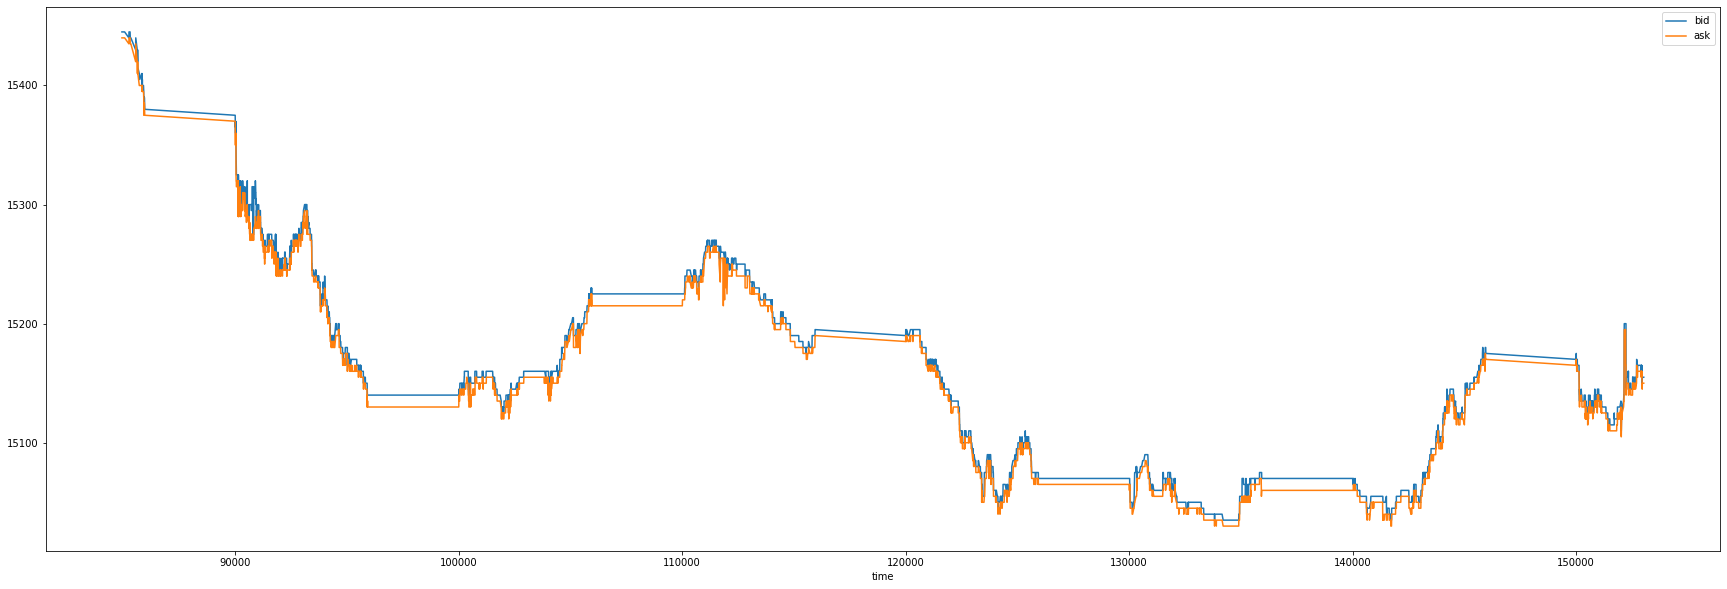

In [ ]:
tiger_top10_bidask = tiger_top10_bidask[::-1]
tiger_top10_bidask.plot()
# kodex200_bidask.plot()

## - bidask 스프레드

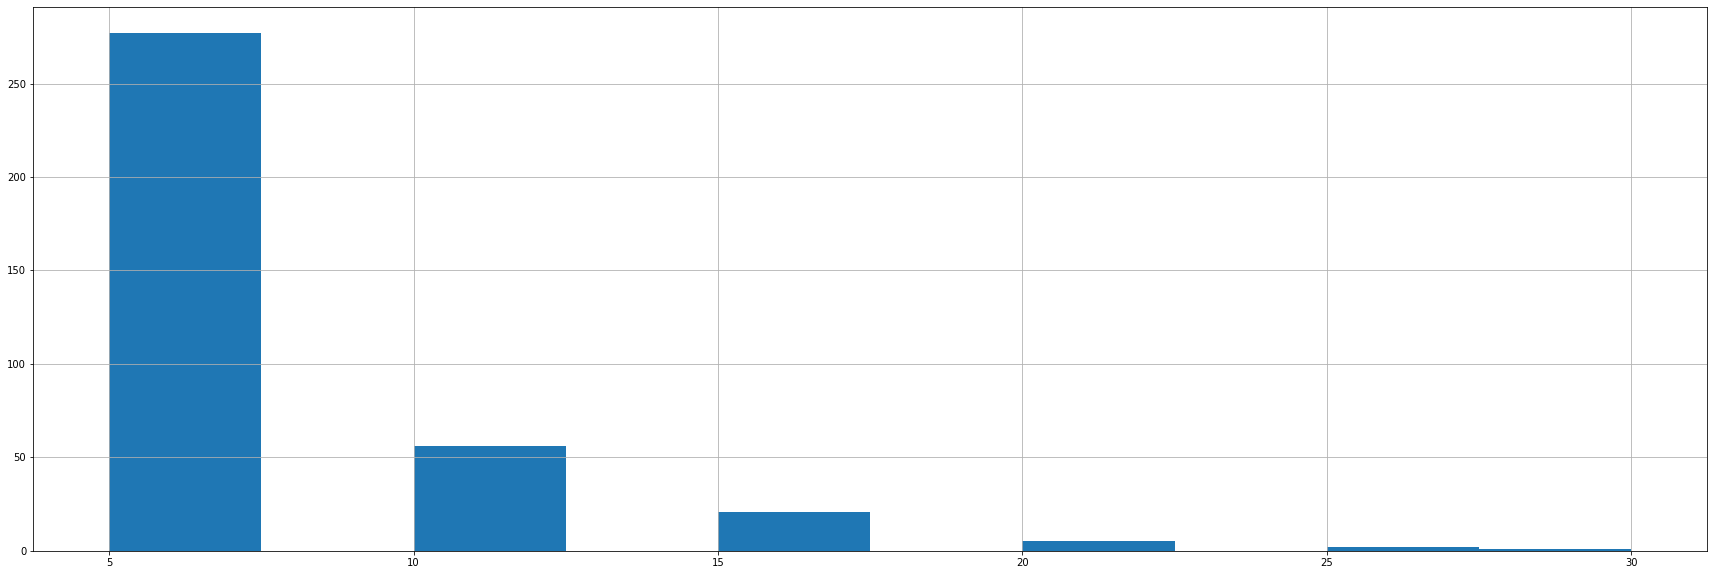

In [ ]:
plt.rcParams["figure.figsize"] = (30, 10)
bidask_spread = tiger_top10_bid-tiger_top10_ask
bidask_spread.hist()

# tiger_top10_ask_kodex200_bid spread freaquency (포지션시작)

-1500    48
-1485    43
-1495    41
-1490    40
-1505    39
-1475    29
-1480    29
-1470    21
-1510    19
-1515    16
-1520     7
-1465     7
-1525     5
-1455     5
-1450     5
-1460     4
-1440     1
-1530     1
-1445     1
-1550     1
dtype: int64


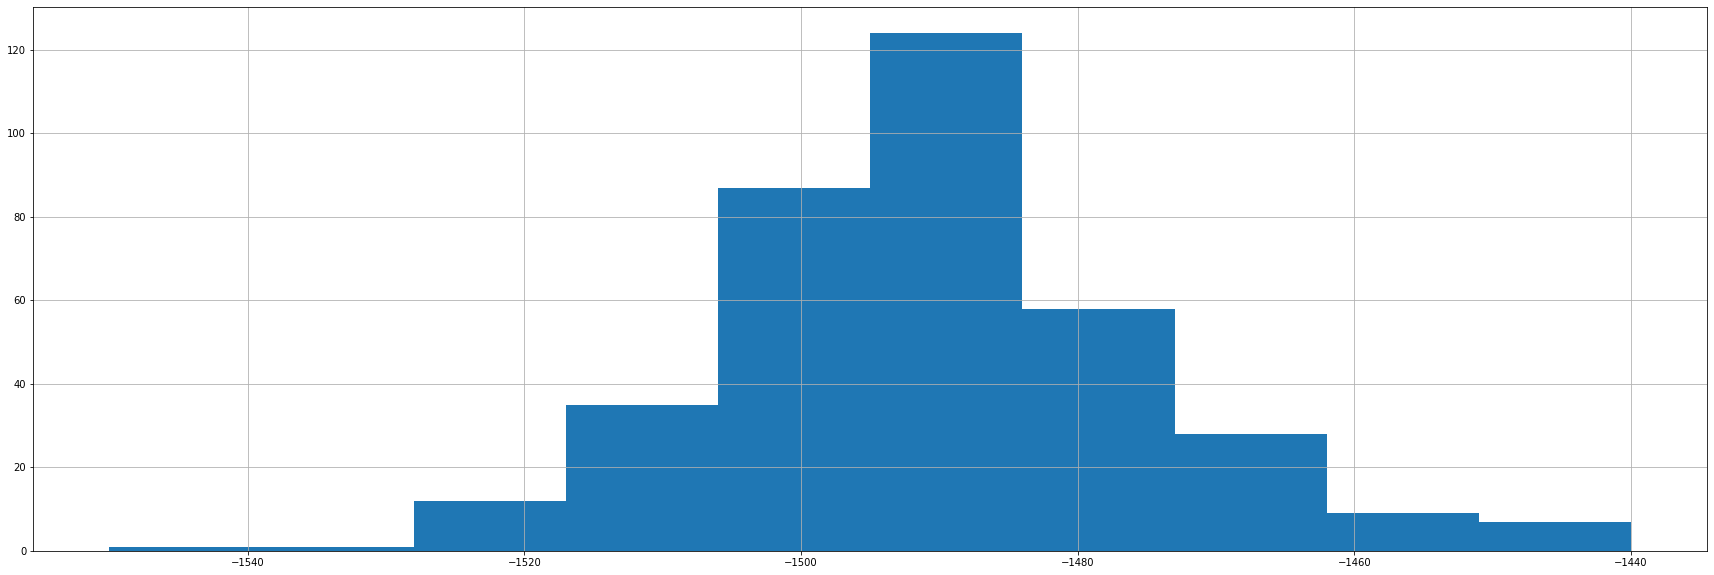

In [ ]:
short = kodex200_ask - tiger_top10_bid
short.hist()
start = short.value_counts() 
print(start[:30])

# kodex200_ask_tiger_top10_bid spread freaquency    (청산포지션)

1485    41
1480    40
1455    39
1475    38
1460    36
1465    35
1470    33
1490    26
1495    18
1450    13
1500    11
1505     6
1440     6
1445     5
1435     5
1430     4
1425     3
1510     2
1540     1
dtype: int64


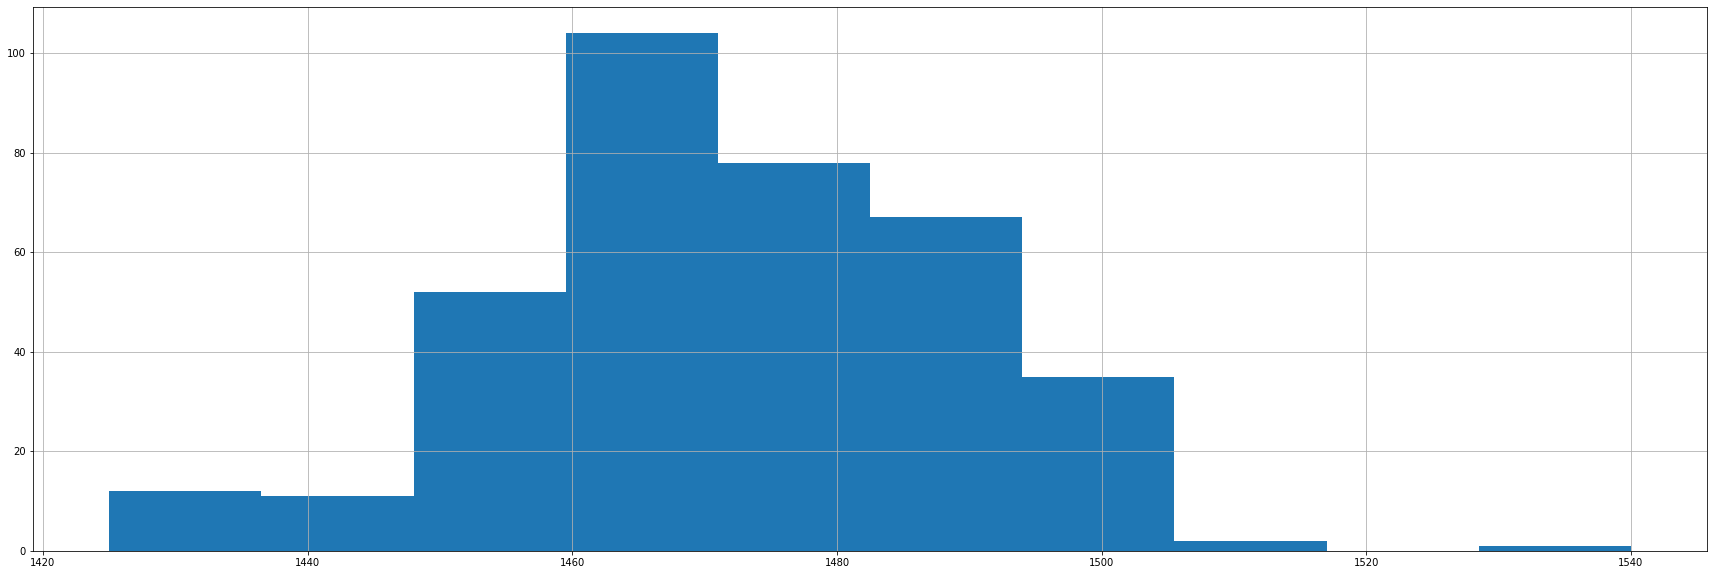

In [ ]:
long = tiger_top10_ask - kodex200_bid
long.hist()
finish = long.value_counts() 
print(finish[:30])

In [ ]:
mean = short.rolling(window=50).mean()
std = short.rolling(window=5).std()
z = (short-mean)/std
z.plot()

# 시뮬레이션

In [ ]:
profit = 0
profits = {}

kodex = 50
tiger_top10 = 50

init = 50

lev = 1

spread_start = list(map(int,start.index))
spread_finish = list(map(int,finish.index))


for j in spread_start[:30]:
    for k in spread_finish[:30]:
        if j + k <= 3*4:
            continue
        profit = 0
        t = 0
        check = None
        kodex = 50
        tiger_top10 = 50
        for i in range(len(bidask)):
            if bidask['kodex200_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= j and init <=tiger_top10<= init*2-lev:
                kodex -= lev
                tiger_top10 += lev
                profit += bidask['kodex200_ask'].iloc[i]*lev - bidask['tiger_top10_bid'].iloc[i]*lev
                print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'short'
            if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and tiger_top10 > init and check == 'short':
                profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex200_bid'].iloc[i]*(tiger_top10-init)
                tiger_top10 = init
                kodex = init
                print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)       
                t += 2


            if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= k and init<= kodex<=init*2-lev:
                kodex += lev
                tiger_top10 -= lev
                profit += bidask['tiger_top10_ask'].iloc[i]*lev - bidask['kodex200_bid'].iloc[i]*lev
                print('longstart',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)
                t += 2
                check = 'long'
            if bidask['kodex200_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= j and kodex > init and check == 'long':
                profit += bidask['kodex200_ask'].iloc[i]*(kodex - init) - bidask['tiger_top10_bid'].iloc[i]*(kodex-init)
                tiger_top10 = init
                kodex = init
                print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)       
                t += 2
        
        if check == 'short':
            profit += bidask['tiger_top10_ask'].iloc[-1]*(tiger_top10 - init) - bidask['kodex200_bid'].iloc[-1]*(tiger_top10-init)
            print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit) 
        if check == 'long':
            profit += bidask['kodex200_ask'].iloc[i]*(kodex - init) - bidask['tiger_top10_bid'].iloc[i]*(kodex-init)
            print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)     

        profits[(j,k,t)] = profit -t*6
        print('-------------------------------------------------------------------------------------------------------------------')

profits = sorted(profits.items(), key=lambda x: x[1], reverse=True)
profits[:20]

# 이동평균 스프레드 시물레이션

In [ ]:
profit = 0
profits = {}

kodex200 = 30
tiger_top10 = 30

init = 30

lev = 1

profit = 0
t = 0
check = None

dfj = []
dfk = []
tempk = 0
tempj = 0

for i in range(len(bidask)):
    short = int(bidask['tiger_top10_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i])
    long =int(bidask['kodex200_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i])

    dfj.append(short)
    dfk.append(long)   

    if i <= 5:
        continue
    
    del dfj[0]
    del dfk[0]

    j = pd.Series(dfj)
    k = pd.Series(dfk)
    j = j.rolling(window=5).mean()
    k = k.rolling(window=5).mean()

    if bidask['kodex200_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= k.iloc[-1]+100 and init <=tiger_top10<= init*2-lev:
        kodex200 -= lev
        tiger_top10 += lev
        profit += bidask['kodex200_ask'].iloc[i]*lev - bidask['tiger_top10_bid'].iloc[i]*lev
        print('shortstart',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)
        print(kodex200,tiger_top10)
        t += 2
        check = 'short'
        tempk = bidask['kodex200_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i]
    if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= -tempk+100 and tiger_top10 > init and check == 'short':
        profit += bidask['tiger_top10_ask'].iloc[i]*(tiger_top10 - init) - bidask['kodex200_bid'].iloc[i]*(tiger_top10-init)
        tiger_top10 = init
        kodex200 = init
        print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)       
        t += 2


    if bidask['tiger_top10_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i] >= j.iloc[-1]+100 and init<= kodex200<=init*2-lev:
        kodex200 += lev
        tiger_top10 -= lev
        profit += bidask['tiger_top10_ask'].iloc[i]*lev - bidask['kodex200_bid'].iloc[i]*lev
        print('longstart',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit)
        print(kodex200,tiger_top10,j.iloc[-1])
        t += 2
        check = 'long'
        tempj = bidask['tiger_top10_ask'].iloc[i] - bidask['kodex200_bid'].iloc[i]
        continue
    if bidask['kodex200_ask'].iloc[i] - bidask['tiger_top10_bid'].iloc[i] >= -tempj+100 and kodex200 > init and check == 'long':
        profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['tiger_top10_bid'].iloc[i]*(kodex200-init)
        tiger_top10 = init
        kodex200 = init
        print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)       
        t += 2

if check == 'short':
    profit += bidask['tiger_top10_ask'].iloc[-1]*(tiger_top10 - init) - bidask['kodex200_bid'].iloc[-1]*(tiger_top10-init)
    print('shortfinish',i,'번째거래 / ','  ask:',bidask['tiger_top10_ask'].iloc[i],'  bid:', bidask['kodex200_bid'].iloc[i],'  profit:',profit) 
    print(kodex200,tiger_top10)
if check == 'long':
    profit += bidask['kodex200_ask'].iloc[i]*(kodex200 - init) - bidask['tiger_top10_bid'].iloc[i]*(kodex200-init)
    print('longfinish',i,'번째거래 / ','  ask:',bidask['kodex200_ask'].iloc[i],'  bid:', bidask['tiger_top10_bid'].iloc[i],'  profit:',profit)    
    print(kodex200,tiger_top10)
print(profit)

0


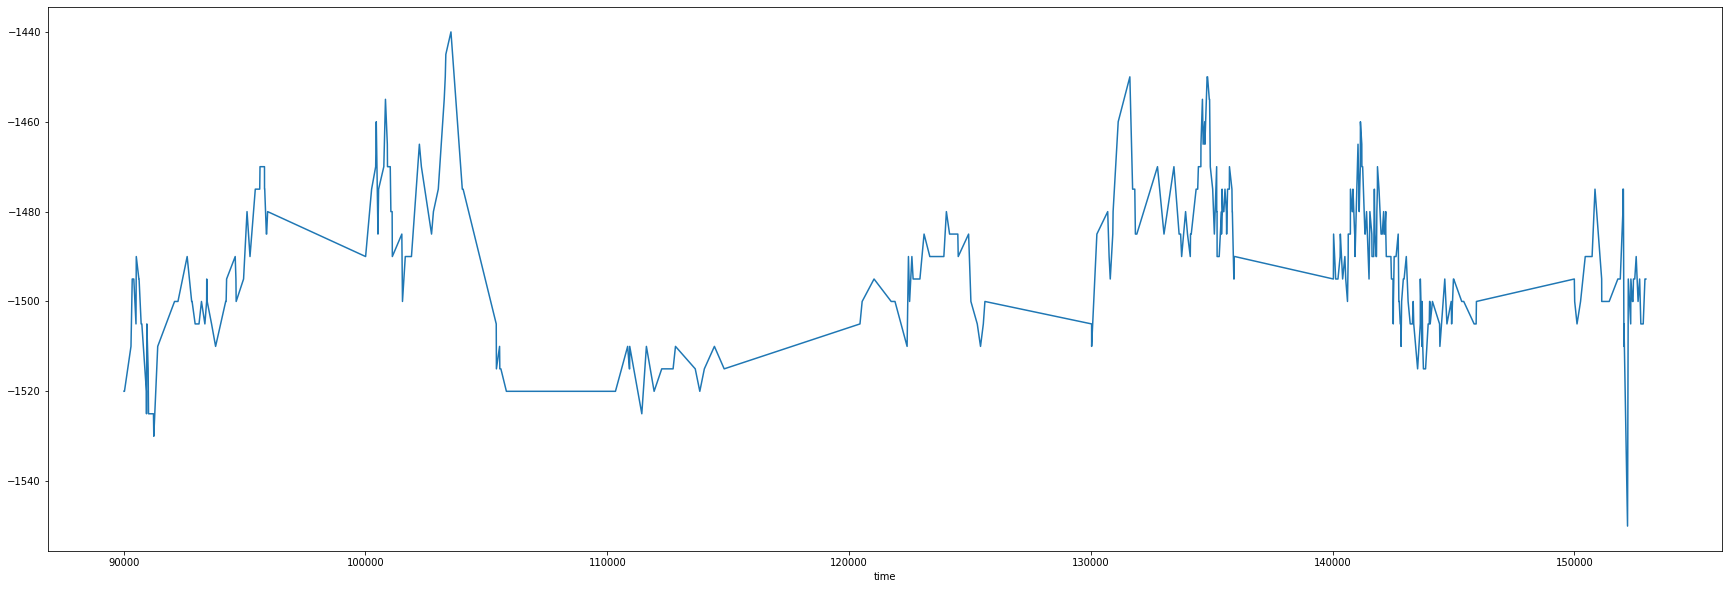

In [ ]:
short.plot()

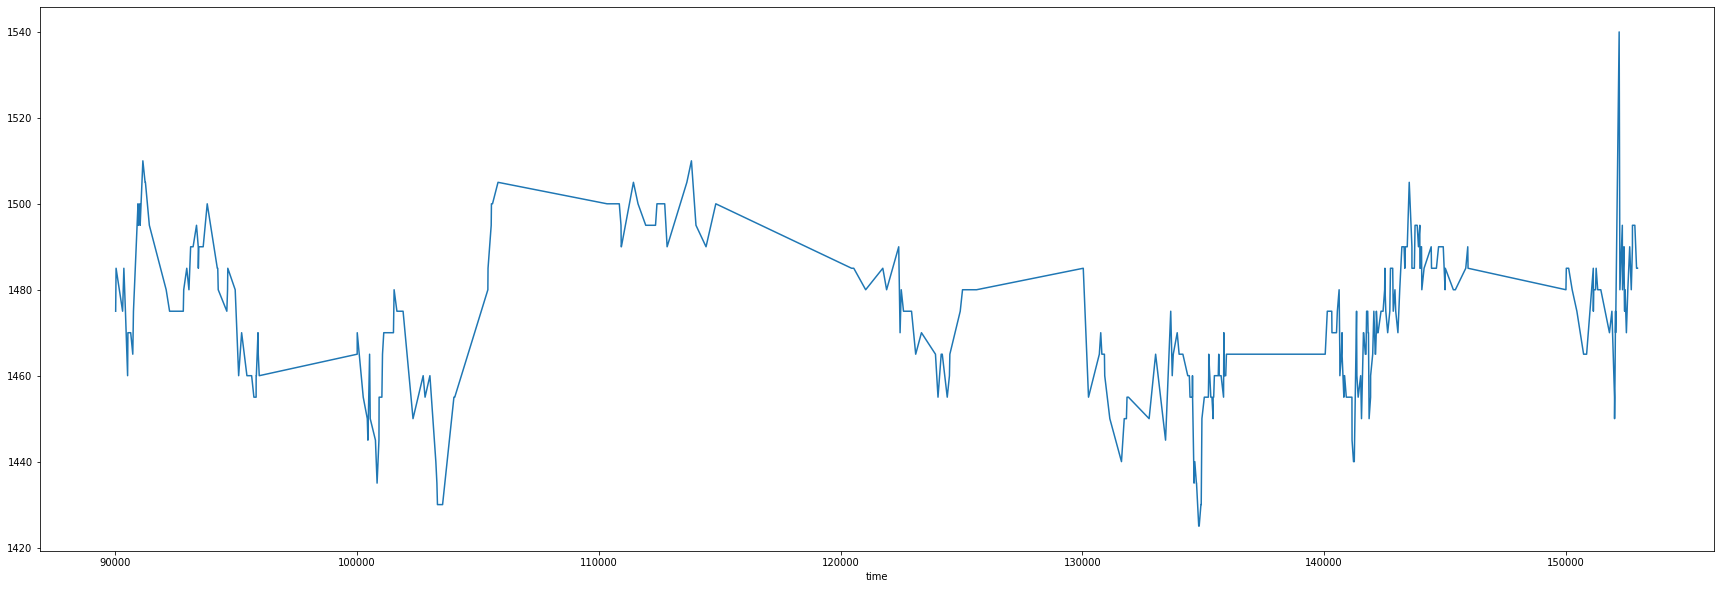

In [ ]:
long.plot()

In [ ]:
long.hist()

AttributeError: ignored

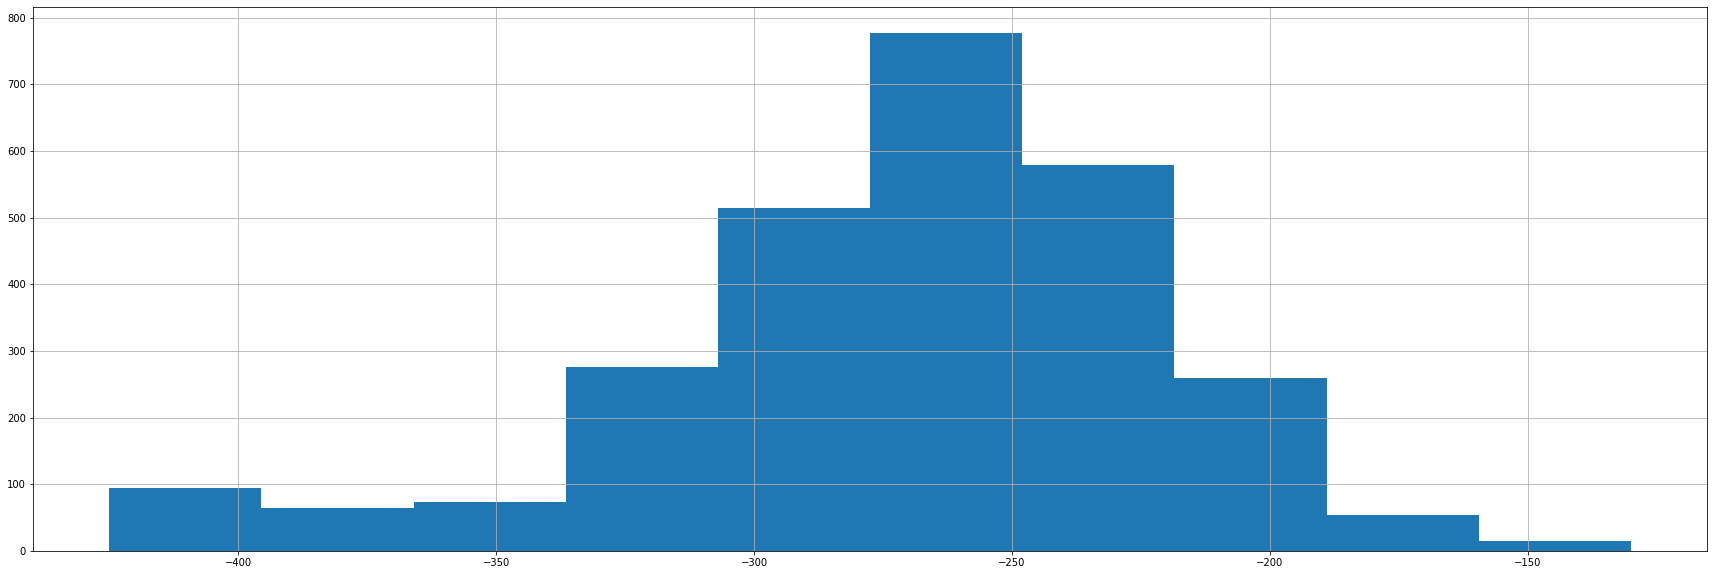

In [ ]:
long.hist()

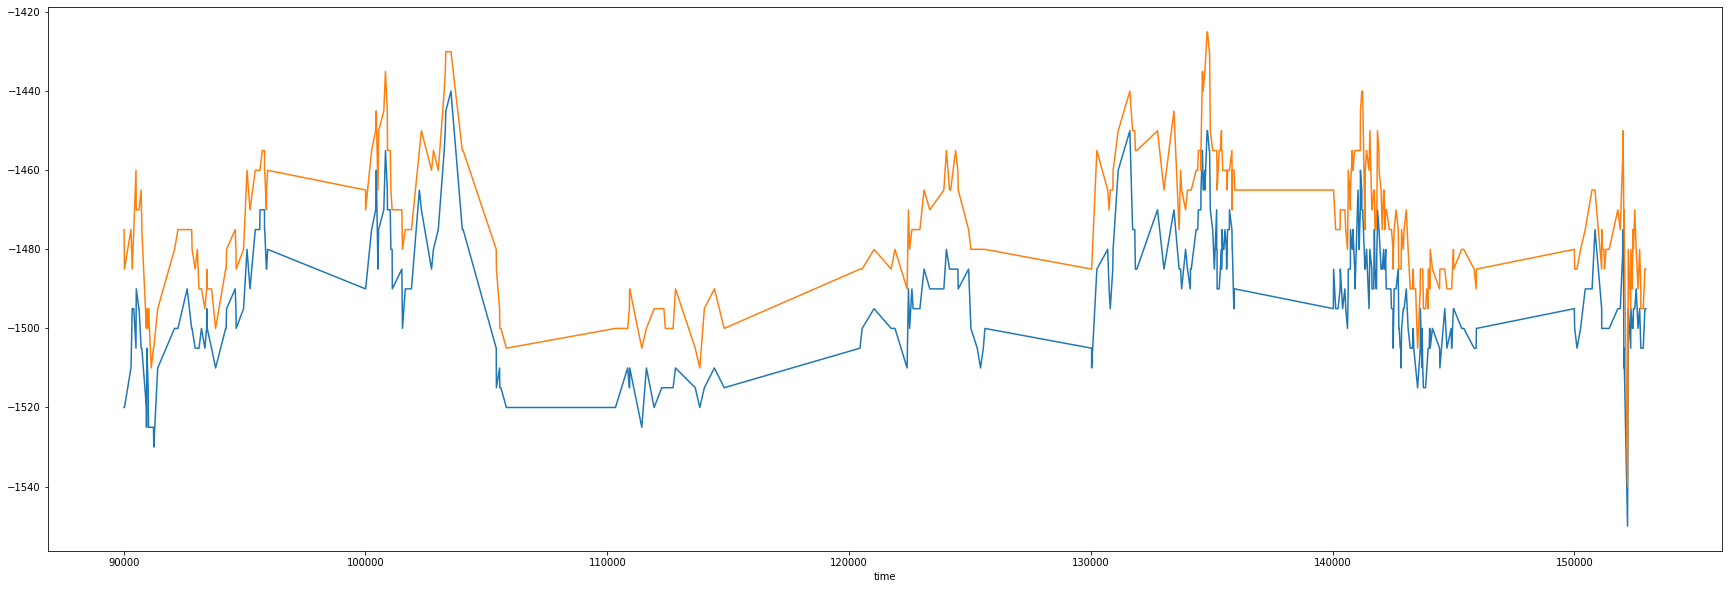

In [ ]:
short.plot()
# (-long.rolling(window = 20).mean()).plot()
# (-long.rolling(window = 20).mean()-10).plot()
(-long).plot()